### EX - ARTIFICIAL NEURAL NETWORK (ANN) ON DIABETES CLASSIFICATION CASE

#### I. Import Python Libraries

In [162]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 

#### II. Load Diabetes Dataset

In [163]:
# Diabetes dataset is imported from CSV format file to Pandas Dataframe 
df = pd.read_csv("G:/My Drive/Work Data/PT. Hutomo Bangun Perkasa/Hydroinformatics/Thesis Research/Artificial Neural Network/Diabetes Modelling with Tensor Flow/diabetes.csv")
df.head() # Checking the first five data in the dataframe 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### III. Define the Independent and Dependent Variables

In [164]:
X = df[df.columns[:-1]].values  # INDEPENDENT VARIABLE
Y = df[df.columns[-1]].values   # DEPENDENT VARIABLE 

##### III.A. Normalize the Range Value in the Independent Variables 
Since the features value inside the independent variables consists of different range of value, we need to normalize the data. Threfore, all the features will be in the same range of value. **By doing this normalization, we can increase the accuracy of the Artificial Neural Network Classification Model**. 

In [165]:
scaler   = StandardScaler() 
X        = scaler.fit_transform(X) 
data     = np.hstack((X, np.reshape(Y, (-1,1))))
trans_df = pd.DataFrame(data, columns=df.columns)

##### III.B. Display the Normalized Dataset in Graph
**The alpha function** is used to display graph that overlays from one to another. While **the density function** is used to normalize the data distribution inside the independent data. This function is needed because, our features have different range of values. 

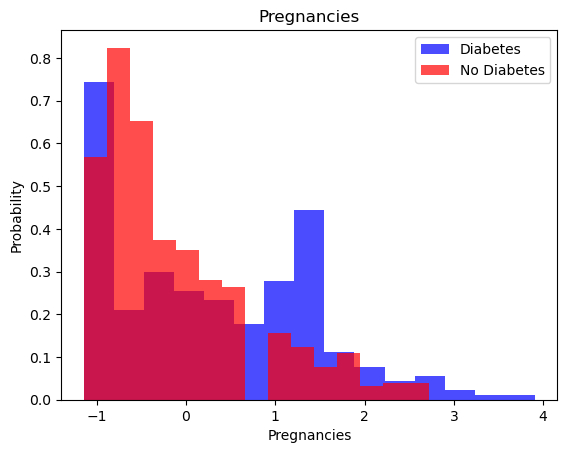

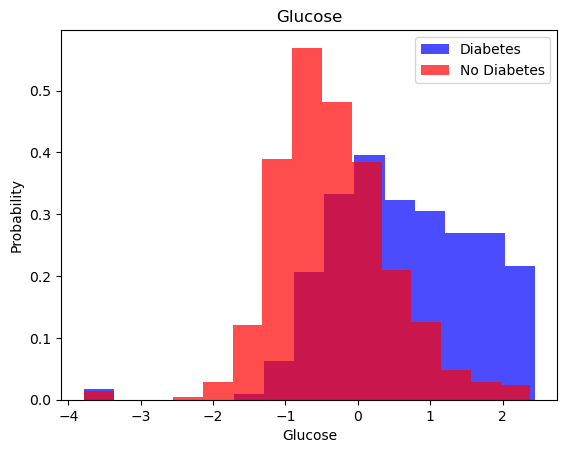

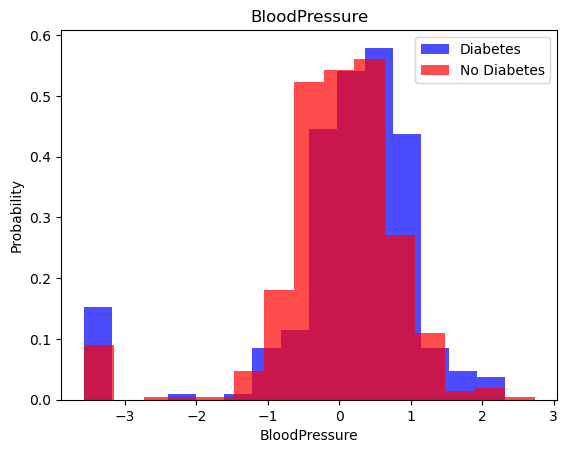

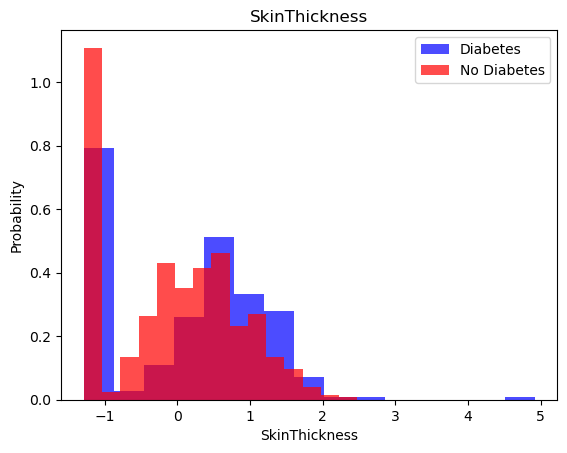

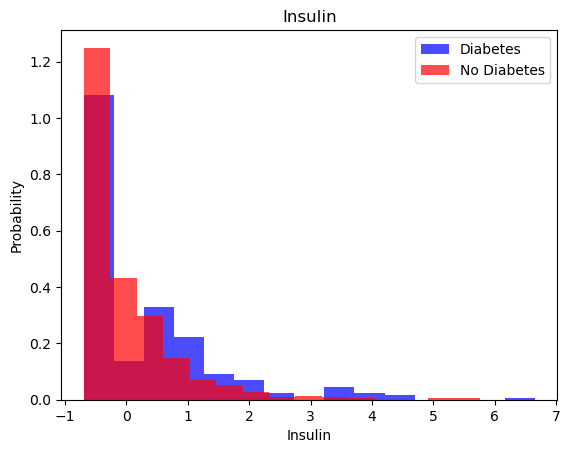

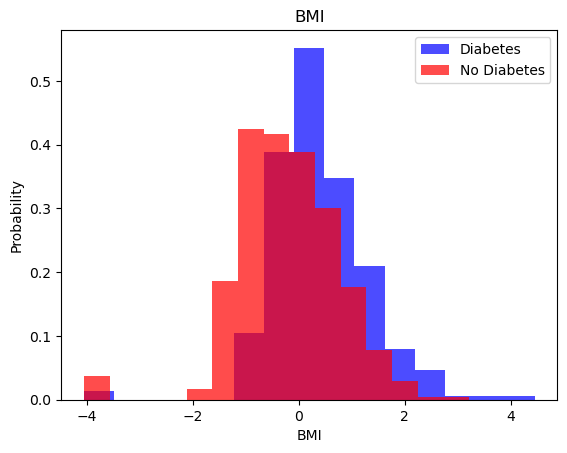

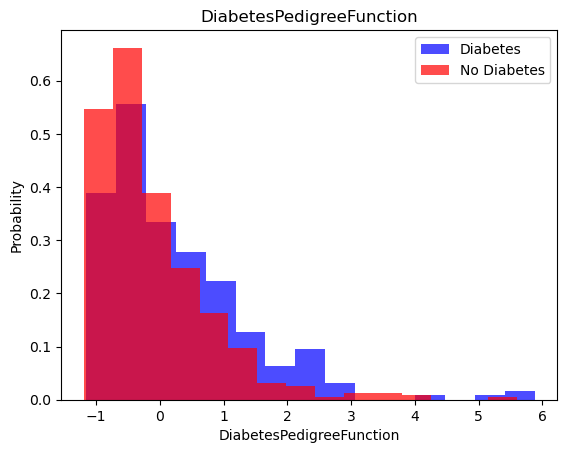

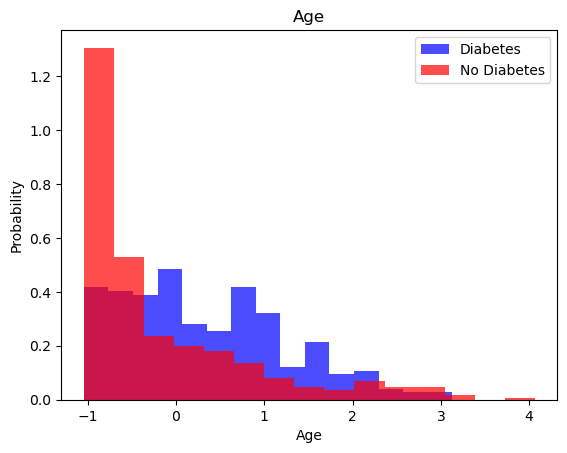

In [166]:
for i in range(len(df.columns[:-1])) : 
    label = df.columns[i]
    plt.hist(trans_df[trans_df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(trans_df[trans_df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

##### III.C. Check the Number of Data for Diabetes and Non-Diabetes State
Since the number of data for diabetes state and non-diabetes state is different (500 for the Non-Diabetes State and 268 for the Diabetes State), we need to justify the amount of data. **In order to cope with the lack of data issue, we can use RandomOverSampler function to randomly select and multiply the data**. 

In [167]:
len(trans_df[trans_df['Outcome']==0]), len(trans_df[trans_df['Outcome']==1])

(500, 268)

In [168]:
over = RandomOverSampler()
X,Y = over.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y, (-1,1)))) # Merge the data
transf_df = pd.DataFrame(data, columns=df.columns)

#### IV. Set the Artificial Neural Network (ANN) Model
##### IV.A. Split the Dataset to Training, Validation, and Testing Dataset

In [169]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)           # SPLITING DEFAULT DATASET TO TRAIN AND TEMPORARY SET
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0) # SPLITTING TEMP DATASET TO VALIDATION AND TESTING SET


##### IV.B. Initiating ANN model

In [170]:
model = tf.keras.Sequential()

##### IV.C. Adding Hidden Layer and Output layer

In [171]:
model.add(tf.keras.layers.Dense(units=16, activation="relu"))  # First hidden layer #
model.add(tf.keras.layers.Dense(units=16, activation="relu"))  # Second hidden layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid")) # Output layer # Sigmoid for binary classification

##### IV.D. Compiling Articial Neural Network (Model)

In [172]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss      = tf.keras.losses.BinaryCrossentropy(),
              metrics   =['accuracy'])

#### V. Run the Artificial Neural Network (ANN) Model 

In [173]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 688us/step - loss: 0.8670 - accuracy: 0.5067


[0.867041826248169, 0.5066666603088379]

##### V.A. Fitting the ANN Model to the Validation Dataset

In [177]:
model.fit(X_train,Y_train, batch_size=32, epochs = 100, validation_data=(X_valid, Y_valid)) 

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4102 - accuracy: 0.8133 - val_loss: 0.4386 - val_accuracy: 0.7700
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8117 - val_loss: 0.4360 - val_accuracy: 0.7950
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8133 - val_loss: 0.4387 - val_accuracy: 0.7800
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8133 - val_loss: 0.4356 - val_accuracy: 0.7650
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8183 - val_loss: 0.4326 - val_accuracy: 0.7750
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8167 - val_loss: 0.4343 - val_accuracy: 0.7850
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8200 - val_loss: 0.4332 - val_accuracy: 0.7700
Epoch 8/100
1

##### V.B. Fitting the ANN Model to the Testing Dataset

In [178]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 997us/step - loss: 0.5273 - accuracy: 0.7600


[0.5272684693336487, 0.7599999904632568]